# RECOMMENDER SYSTEM

In [39]:
# import image module 
from IPython.display import Imag

# get the image 
Image(url="collaborative filtering.png") 0) 


SyntaxError: unmatched ')' (513124980.py, line 5)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
sns.set_theme(style='darkgrid', palette='viridis')
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Recommender%20System/Movie.csv')
df

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


# EDA

#### DESCRIPTIVE ANALYSIS

In [3]:
# descriptive statistics
df.describe()

,userId,rating
count,8992.000000,8992.000000
mean,3521.880116,3.557162
std,2012.497384,0.967071
min,1.000000,0.500000
25%,1779.000000,3.000000
50%,3530.000000,3.500000
75%,5213.250000,4.000000
max,7120.000000,5.000000


In [4]:
# maximum rating is 5 that means ratings has been given in the range of 0.5 to 5
# NO missing values

In [5]:
# shape of data
df.shape

(8992, 3)

In [6]:
# check duplicate values
df.duplicated().sum()

0

In [7]:
# confirm null values
df.isna().sum()

userId    0
movie     0
rating    0
dtype: int64

In [8]:
# checking datatype of columns
df.dtypes

userId      int64
movie      object
rating    float64
dtype: object

#### checking unique values to decide what type of collaborative filtering is to be use: user_to_user or item_to_item based

In [9]:
df['movie'].nunique()

10

In [10]:
df['userId'].nunique()

4081

In [11]:
# because there are more unique values in the userID so I will use USER_BASED collaborative filtering

In [12]:
df['movie'].value_counts()

movie
Toy Story (1995)                      2569
GoldenEye (1995)                      1548
Heat (1995)                           1260
Jumanji (1995)                        1155
Sabrina (1995)                         700
Grumpier Old Men (1995)                685
Father of the Bride Part II (1995)     657
Sudden Death (1995)                    202
Waiting to Exhale (1995)               138
Tom and Huck (1995)                     78
Name: count, dtype: int64

# DATA VISUALIZATION

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Toy Story (1995)'),
  Text(1, 0, 'Jumanji (1995)'),
  Text(2, 0, 'Grumpier Old Men (1995)'),
  Text(3, 0, 'Waiting to Exhale (1995)'),
  Text(4, 0, 'Father of the Bride Part II (1995)'),
  Text(5, 0, 'Heat (1995)'),
  Text(6, 0, 'Sabrina (1995)'),
  Text(7, 0, 'Tom and Huck (1995)'),
  Text(8, 0, 'Sudden Death (1995)'),
  Text(9, 0, 'GoldenEye (1995)')])

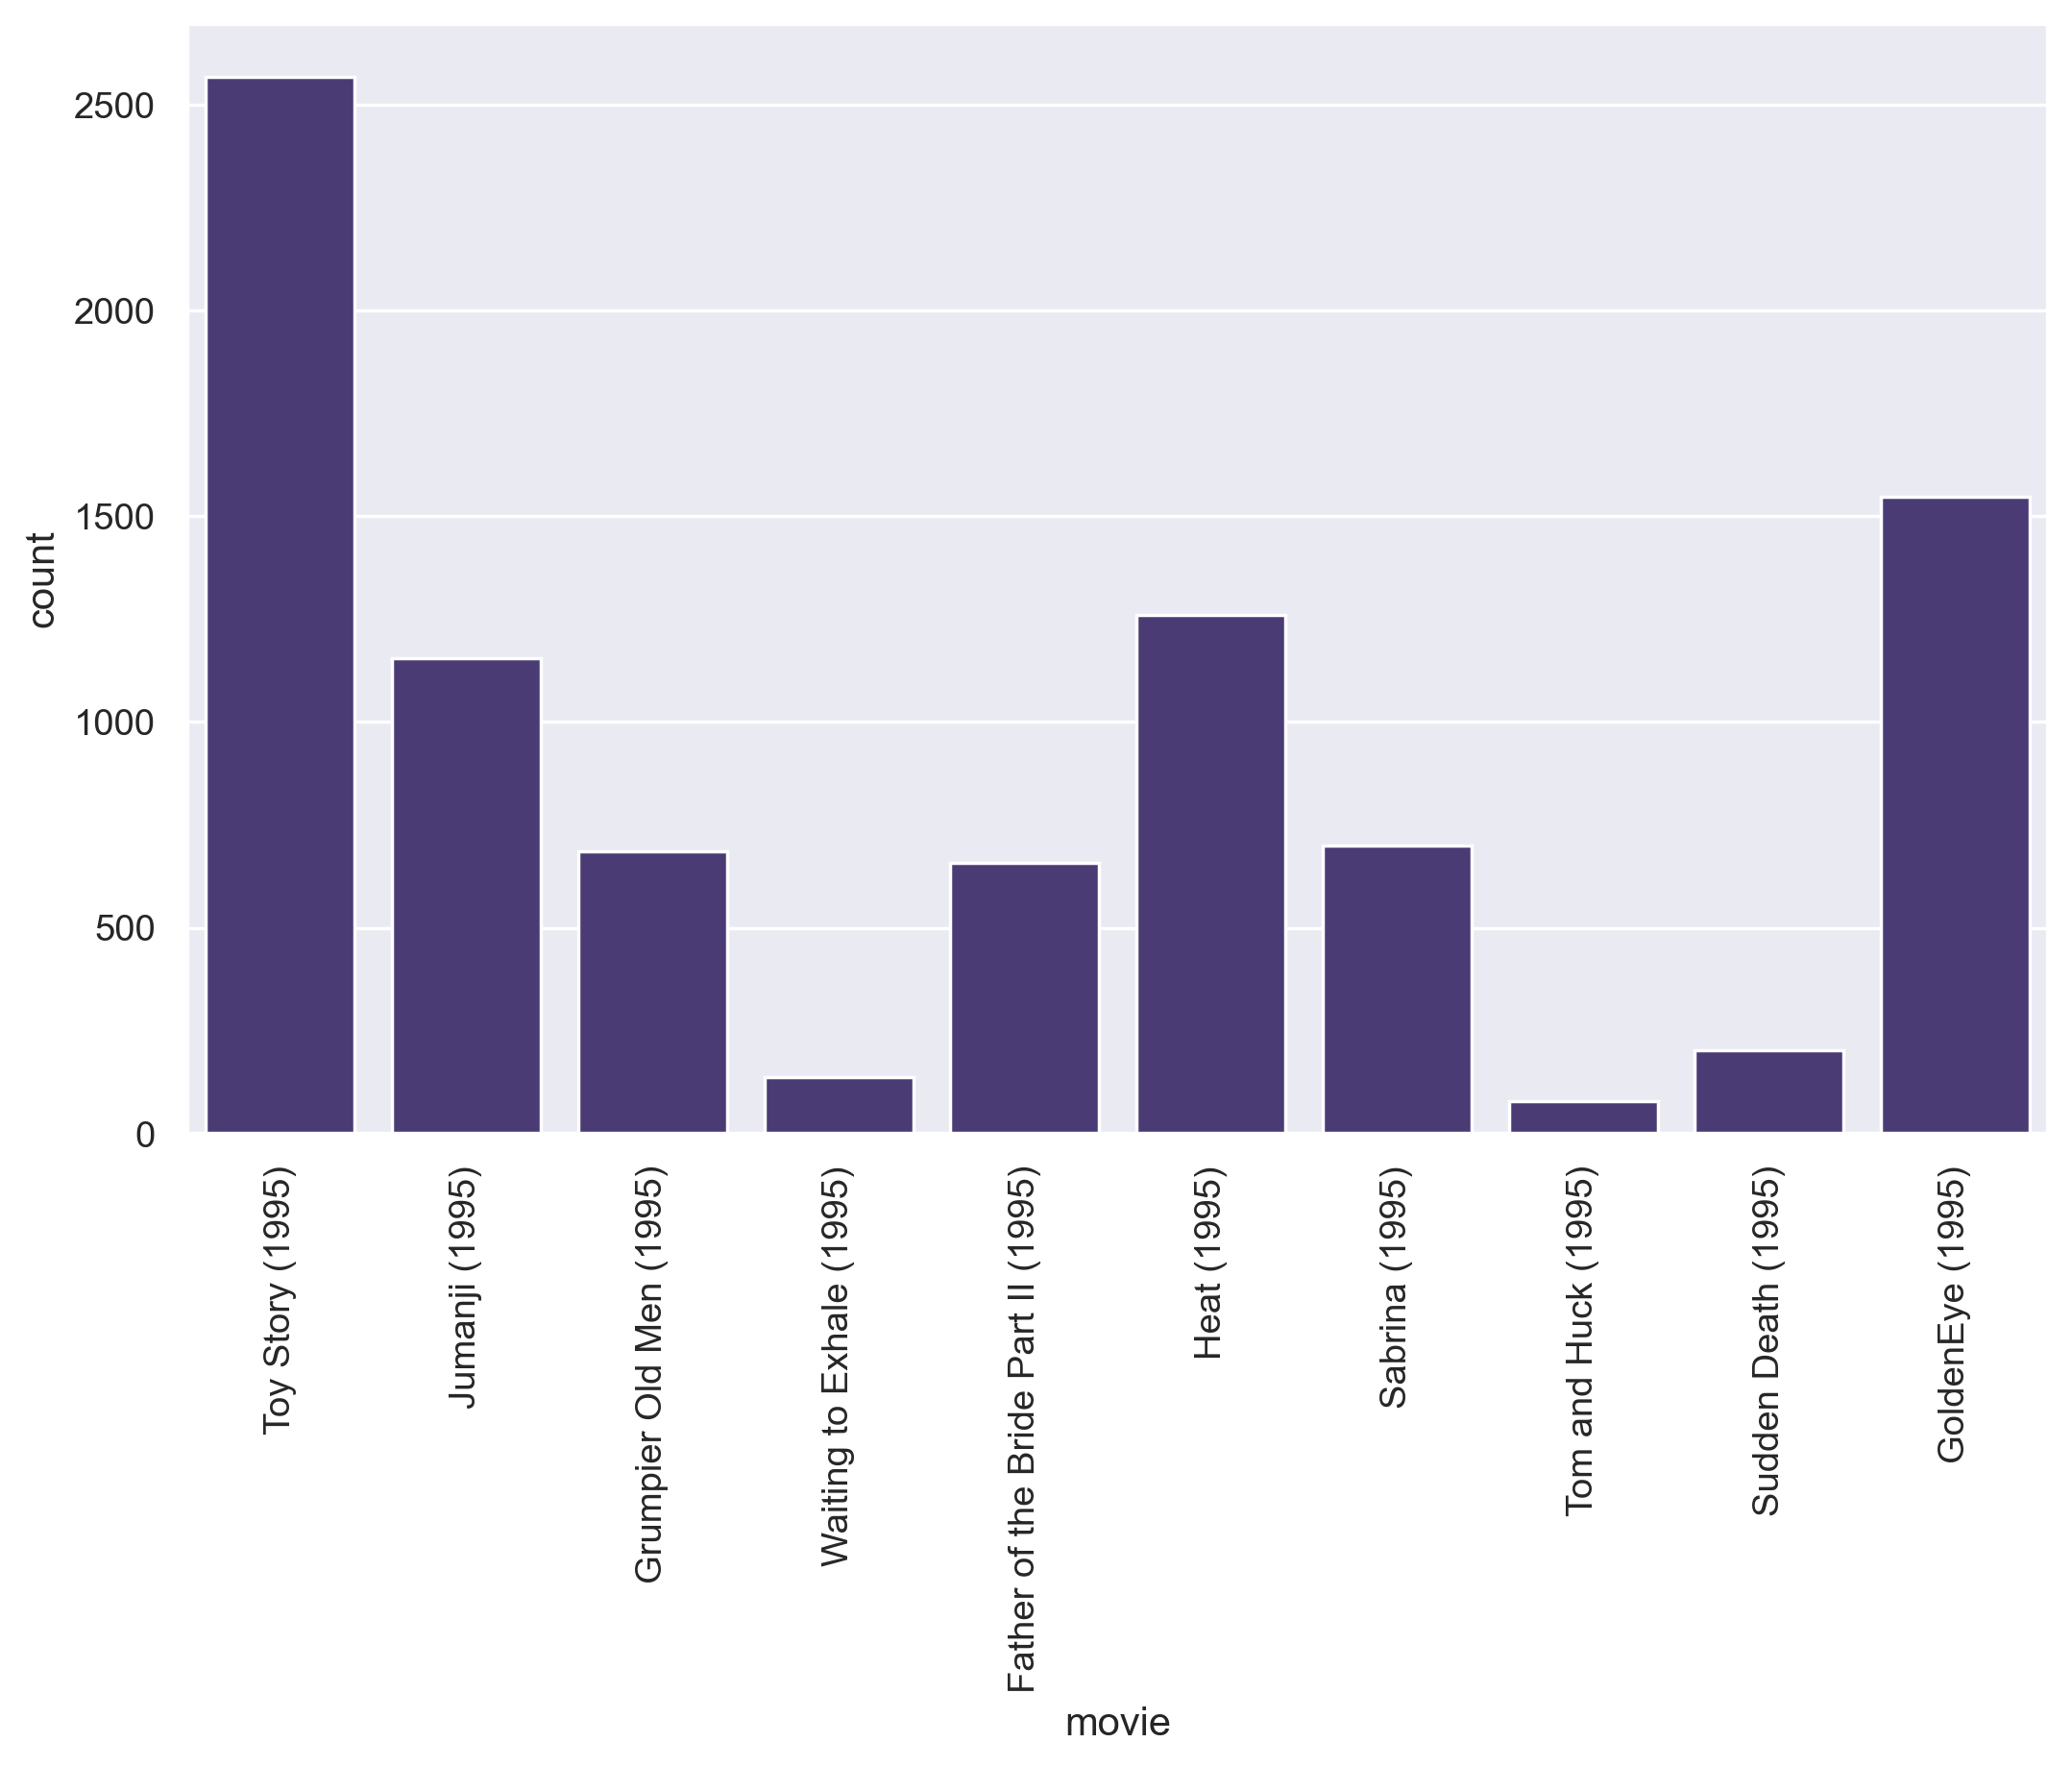

In [13]:
sns.countplot(x=df['movie'])
plt.xticks(rotation=90)

In [14]:
# Toy Story is the most watched movie 
# Tom and Huck is the least watched movie among these movies

# MODEL BUILDING

In [15]:
df.head(3)

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0


In [16]:
# coverting each user in p-dimensional vector
pivot = pd.pivot(data=df, index='userId', columns='movie', values='rating')
pivot

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [17]:
pivot.fillna(0, inplace=True)

In [18]:
pivot

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [19]:
# calculating distance and similarity

In [20]:
sim = cosine_similarity(pivot)
sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [21]:
# replacing 1 value of diagonal region because it is representing similarity with itself which is a useless information 
# and it will create problem later on if I don't deal with it

np.fill_diagonal(sim, 0)

In [22]:
similarity =  pd.DataFrame(sim)
similarity

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [23]:
 # instead of common index for rows and columns I want unique user ID because I want to find out similarity between the users

In [24]:
similarity.index = df['userId'].unique()

In [25]:
similarity.columns = df['userId'].unique()

In [26]:
similarity

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
7070,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
7080,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
7087,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [27]:
# let's see the users who are 100% similar to each other

In [28]:
similarity.idxmax()

3         11
6        168
8         16
10      4047
11         3
        ... 
7044      80
7070    1808
7080     708
7087       8
7105    4110
Length: 4081, dtype: int64

In [29]:
# let's find out 1st pair of user who are similar to each other
df[(df['userId'] == 3) | (df['userId'] == 11) ]

,userId,movie,rating
0,3,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
7446,11,GoldenEye (1995),2.5


In [30]:
# I can make a conclusion that userId 3 and 11 are similar to each other. 
# userId 11 watched GoldenEye movie but userId 3 has not watched this movie.
# when it come to recommendation of movie then I cannot recommned GoldenEye (1995) move to userId 3 because userId 11 didn't like this movie

In [31]:
df[(df['userId'] == 7080) | (df['userId'] == 708)]

,userId,movie,rating
241,708,Toy Story (1995),3.0
5311,708,Heat (1995),1.0
8985,7080,GoldenEye (1995),5.0


In [32]:
# I can recommend GoldenEye (1995)	movie to userId 708 because userId 708 and userId 7080 are similary to each other and userId 7080 like this movie

# let's find those people who are more than 50% similar to each other

In [33]:
similarity[similarity > 0.50]

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.707107,NaN,NaN,NaN,NaN,NaN,0.553372
6,NaN,NaN,NaN,NaN,NaN,NaN,0.707107,0.615457,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,0.650945,NaN,NaN,1.000000,0.874157,...,NaN,1.000000,NaN,0.707107,NaN,NaN,0.752577,NaN,1.000000,0.622543
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615457,NaN,NaN,...,0.8,NaN,NaN,NaN,0.989949,NaN,NaN,0.619422,NaN,NaN
11,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.707107,NaN,NaN,NaN,NaN,NaN,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.658505,NaN,NaN,NaN
7070,NaN,NaN,0.752577,NaN,NaN,NaN,NaN,NaN,0.752577,0.657870,...,NaN,0.752577,NaN,0.532152,NaN,0.658505,NaN,NaN,0.752577,NaN
7080,NaN,NaN,NaN,0.619422,NaN,0.701884,0.567775,0.889532,NaN,0.568212,...,NaN,NaN,NaN,NaN,0.648886,NaN,NaN,NaN,NaN,NaN
7087,NaN,NaN,1.000000,NaN,NaN,0.650945,NaN,NaN,1.000000,0.874157,...,NaN,1.000000,NaN,0.707107,NaN,NaN,0.752577,NaN,NaN,0.622543
